# Level-1

Text(0.5, 1.0, 'Input data')

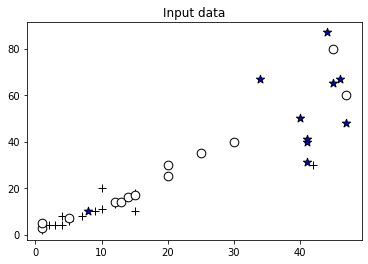

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

# Load input data
input_file = 'created_dataset.txt'

data = np.loadtxt(input_file, delimiter=',')
X = data[:, :-1]
y = data[:, -1]

class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])
class_2 = np.array(X[y==2])


# Visualize input data
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', 
        edgecolors='black', linewidth=1, marker='+')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
        edgecolors='black', linewidth=1, marker='o')
plt.scatter(class_2[:, 0], class_2[:, 1], s=75, facecolors='blue', 
        edgecolors='black', linewidth=1, marker='*')
plt.title('Input data')



# Level-2

In [2]:
# Split data into training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# Decision Trees classifier 
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)

# Evaluate classifier performance
class_names = ['Class-0', 'Class-1','Class-2']
print("\nClassifier performance on dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))

plt.show()


Classifier performance on dataset

              precision    recall  f1-score   support

     Class-0       0.75      0.60      0.67         5
     Class-1       0.33      0.25      0.29         4
     Class-2       0.33      1.00      0.50         1

    accuracy                           0.50        10
   macro avg       0.47      0.62      0.48        10
weighted avg       0.54      0.50      0.50        10



In [3]:
import numpy as np
import sklearn.ensemble
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")


In [4]:
test_datapoints = np.array([[7, 10], [12, 13], [14, 17], [27, 30], [42,61], [3, 9]])

In [5]:
print("\nConfidence measure:")
for datapoint in test_datapoints:
  probabilities = classifier.predict_proba([datapoint])[0]
  predicted_class = 'Class-' + str(np.argmax(probabilities))
  print('\nDatapoint:', datapoint)
  print('Predicted class:', predicted_class)


Confidence measure:

Datapoint: [ 7 10]
Predicted class: Class-0

Datapoint: [12 13]
Predicted class: Class-1

Datapoint: [14 17]
Predicted class: Class-1

Datapoint: [27 30]
Predicted class: Class-1

Datapoint: [42 61]
Predicted class: Class-2

Datapoint: [3 9]
Predicted class: Class-0


# Level-3

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def visualize_classifier(classifier, X, y, title=''):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Specify the title
    plt.title(title)

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

  

    plt.show()

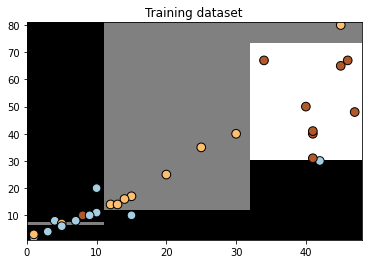

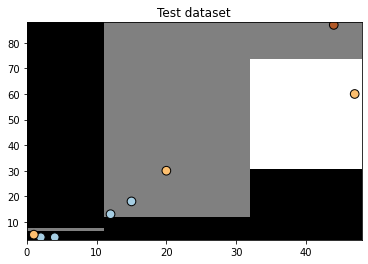


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.83      1.00      0.91        10
     Class-1       1.00      0.90      0.95        10
     Class-2       1.00      0.89      0.94         9

    accuracy                           0.93        29
   macro avg       0.94      0.93      0.93        29
weighted avg       0.94      0.93      0.93        29

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.67      0.50      0.57         4
     Class-1       0.25      0.33      0.29         3
     Class-2       0.00      0.00      0.00         1

    accuracy                           0.38         8
   macro avg       0.31      0.28      0.29         8
weighted avg       0.43      0.38      0.39         8

###########################

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

# Decision Trees classifier 
params = {'random_state': 0, 'max_depth': 4}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

# Evaluate classifier performance
class_names = ['Class-0', 'Class-1','Class-2']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")

plt.show()

In [11]:
print("\nConfidence measure:")
for datapoint in test_datapoints:
  probabilities = classifier.predict_proba([datapoint])[0]
  predicted_class = 'Class-' + str(np.argmax(probabilities))
  print('\nDatapoint:', datapoint)
  print('Predicted class:', predicted_class)
  print('Confidence value of the classes', probabilities)


Confidence measure:

Datapoint: [ 7 10]
Predicted class: Class-0
Confidence value of the classes [0.66666667 0.         0.33333333]

Datapoint: [12 13]
Predicted class: Class-1
Confidence value of the classes [0. 1. 0.]

Datapoint: [14 17]
Predicted class: Class-1
Confidence value of the classes [0. 1. 0.]

Datapoint: [27 30]
Predicted class: Class-1
Confidence value of the classes [0. 1. 0.]

Datapoint: [42 61]
Predicted class: Class-2
Confidence value of the classes [0. 0. 1.]

Datapoint: [3 9]
Predicted class: Class-0
Confidence value of the classes [0.66666667 0.         0.33333333]
